# Quick Overview

This chapter gives a quick overview into how to use the package. Detailed explanations can be found in the subchapters of the respective sub-classes.

Import the package and use the recommended abbreviation ``h5tbx``. We also will need `numpy`:

In [1]:
import h5rdmtoolbox as h5tbx
import numpy as np

## Create a HDF file

We recommend using python's context manager. If no filename is passed to the wrapper file, then a temporary file is created. This file is deleted when you python program finishes/the kernel is stopped. Per default, the mode is `r+`

In [2]:
with h5tbx.H5File() as h5:
    print(h5.hdf_filename.name)  # equal to h5.filename but a pathlib.Path and exists also after file is closed

tmp0.hdf


## Create a dataset

Assume we have a signal over time as numpy-arrays. We create two datasets for them. As signal is a function of time, we use HDF dimension scales (https://docs.h5py.org/en/stable/high/dims.html)  to make the relationship:

In [3]:
time = np.linspace(0, 1, 101)
signal = np.sin(2*np.pi*3*time)

signal_filename = h5tbx.generate_temporary_filename(suffix='h.hdf')

with h5tbx.H5File(signal_filename, mode='w') as h5:
    ds_time = h5.create_dataset(name='time', data=time, long_name='time', units='s', make_scale=True)
    ds_signal = h5.create_dataset(name='signal', data=signal, long_name='my signal', units='V', attach_scale=ds_time)

## Create a group
Groups don't really differ from the implementation in `h5py` except they allow to pass the attibute `long_name` as an optional parameter:

In [4]:
with h5tbx.H5File(signal_filename, mode='r+') as h5:
    h5.create_group('mygroup', overwrite=True, long_name='my special group')

## Plot a data
Plotting data is simple as the return value of a sliced HDF dataset is a `xr.DataArray` which, thanks to the package `xarray`, provides a plotting function:

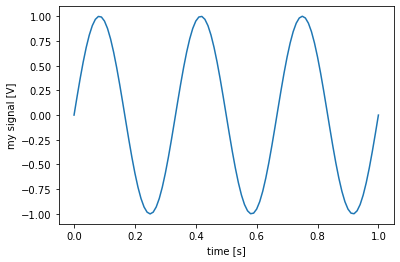

In [5]:
with h5tbx.H5File(signal_filename, 'r') as h5:
    h5['signal'][:].plot()

## Natural Naming
Until here we used the conventional way of addressing variables and groups in a dictionary-like style. `h5RDMtoolbox` allows to use "natural naming" which means that we can address those objects as if they were attributes:

In [6]:
with h5tbx.H5File(signal_filename, 'r') as h5:
    ds = h5.signal[:]
    grp = h5.mygroup

## Inspect file content
Often it is necessary to recall the content of a file. Calling `dump()` on a group represents the content (dataset, groups and attributes) as a pretty nd interactive (!) html representation. This is adopted from the `xarray` package. All credits for this idea go there. The representation here avoids showing data, though. Outside an IPython environment call `sdump()` to get a string representation of the file.

In [7]:
with h5tbx.H5File(signal_filename) as h5:
    h5.dump()
    print('+-----------------+\n')
    h5.sdump()

+-----------------+

> H5File: Group name: /.

a: __h5rdmtoolbox_version__:      0.1.0
a: __standard_name_table__:       EmptyStandardizedNameTable-v0
a: __wrcls__:                     H5File
a: creation_time:                 2022-08-12T15:19:27Z+0200
signal                 (101,)                V       
time                   (101,)                s       
/mygroup

